In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

In [2]:
!ls data

prosperLoanData.csv


In [3]:
df = pd.read_csv('data/prosperLoanData.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [14]:
df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

---

In [31]:
for col in df[:5]:
    print(df[col].describe())
    print()

count                      113937
unique                     113066
top       17A93590655669644DB4C06
freq                            6
Name: ListingKey, dtype: object

count    1.139370e+05
mean     6.278857e+05
std      3.280762e+05
min      4.000000e+00
25%      4.009190e+05
50%      6.005540e+05
75%      8.926340e+05
max      1.255725e+06
Name: ListingNumber, dtype: float64

count                            113937
unique                           113064
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

c

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

count             113937
unique                 8
top       $25,000-49,999
freq               32192
Name: IncomeRange, dtype: object

count     113937
unique         2
top         True
freq      105268
Name: IncomeVerifiable, dtype: object

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

count                      113937
unique                     113066
top       CB1B37030986463208432A1
freq                            6
Name: LoanKey, dtype: object

count    22085.000000
mean         1.421100
std          0.764042
min          0.000000
25%          1.000000
50%          1.000000
75%          2.00

---

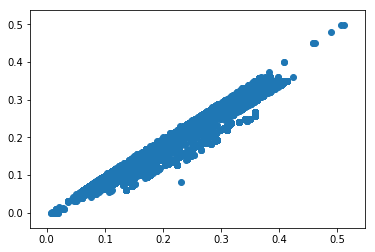

In [37]:
x = df['BorrowerAPR'].values
y = df['BorrowerRate'].values

plt.scatter(x, y)
plt.show()

SpearmanrResult(correlation=0.9894193209482549, pvalue=0.0)


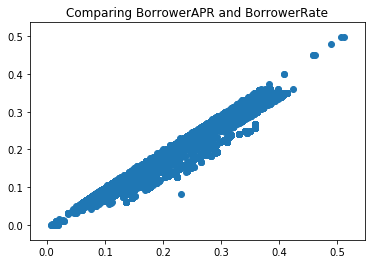

SpearmanrResult(correlation=0.9992520568276085, pvalue=0.0)


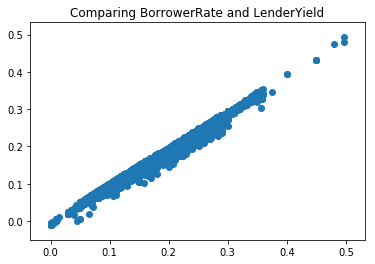

SpearmanrResult(correlation=0.9183727240571069, pvalue=0.0)


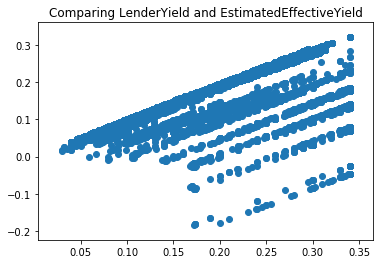

SpearmanrResult(correlation=0.8845522705361033, pvalue=0.0)


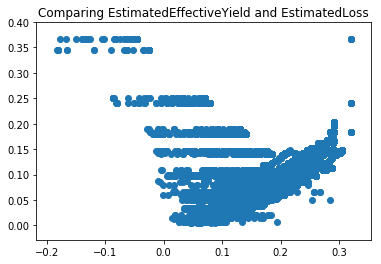

SpearmanrResult(correlation=0.7524821355958692, pvalue=0.0)


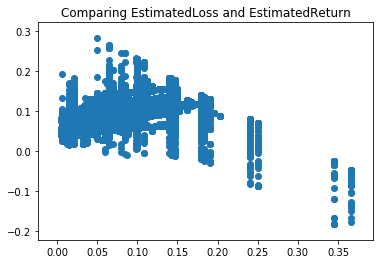

SpearmanrResult(correlation=-0.7461856431766154, pvalue=0.0)


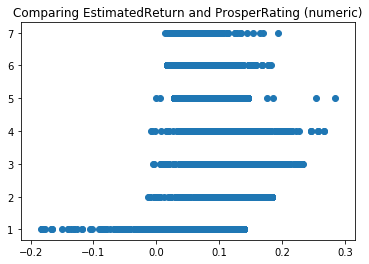

SpearmanrResult(correlation=0.7059401334742064, pvalue=0.0)


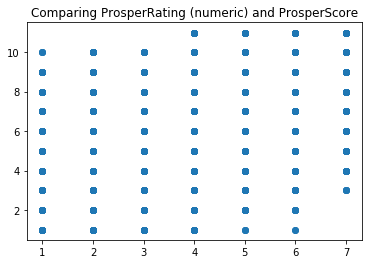

SpearmanrResult(correlation=-0.005061259646310271, pvalue=0.14044276643702816)


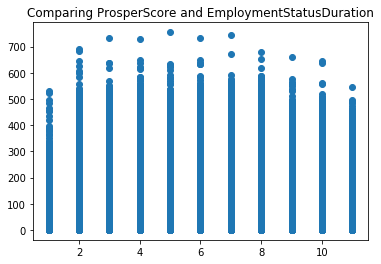

SpearmanrResult(correlation=0.0811902285733982, pvalue=6.343740673150766e-155)


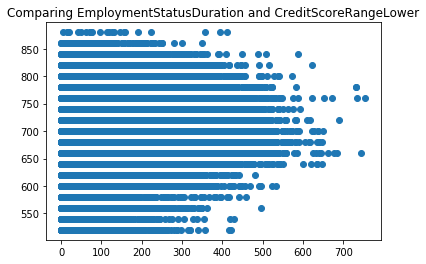

SpearmanrResult(correlation=1.0, pvalue=0.0)


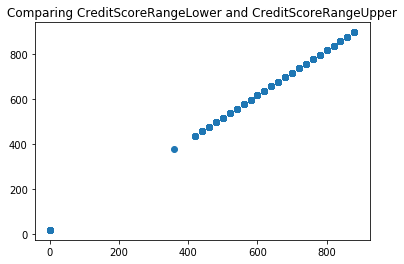

SpearmanrResult(correlation=0.15643758592809445, pvalue=0.0)


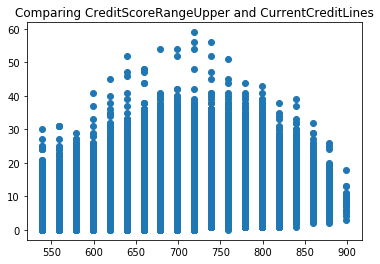

SpearmanrResult(correlation=0.95545268346175, pvalue=0.0)


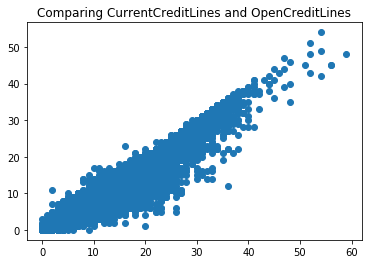

SpearmanrResult(correlation=0.5664641248678572, pvalue=0.0)


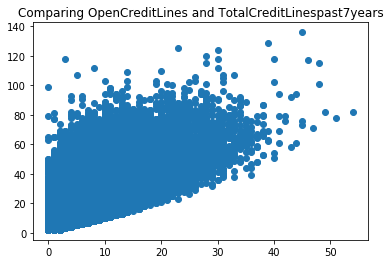

SpearmanrResult(correlation=0.42830538889371245, pvalue=0.0)


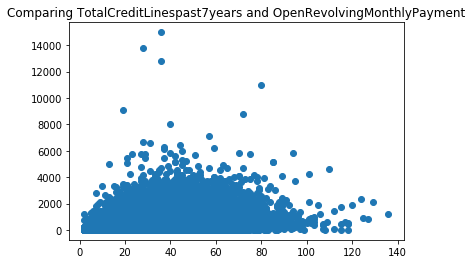

SpearmanrResult(correlation=-0.10727842206155681, pvalue=5.163799954683272e-287)


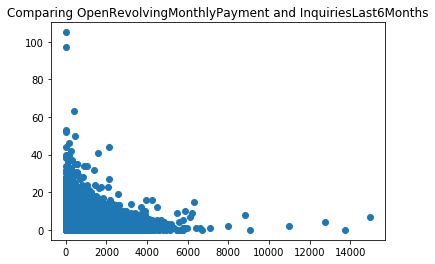

SpearmanrResult(correlation=0.6130672412160673, pvalue=0.0)


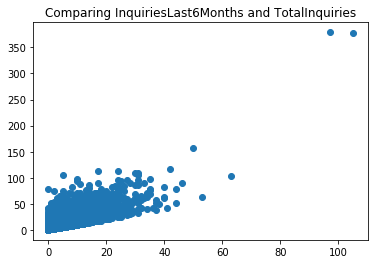

SpearmanrResult(correlation=0.13407117119356377, pvalue=0.0)


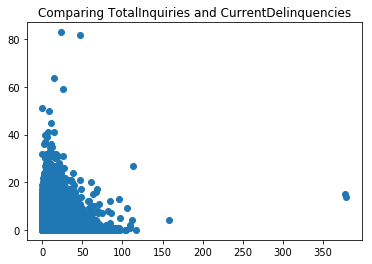

SpearmanrResult(correlation=0.8861378002593798, pvalue=0.0)


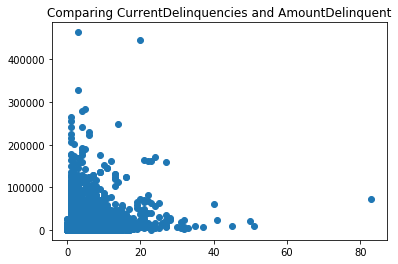

SpearmanrResult(correlation=0.375849841851563, pvalue=0.0)


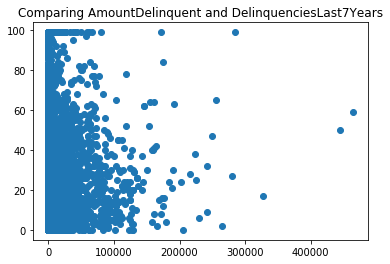

SpearmanrResult(correlation=0.3604269013480139, pvalue=0.0)


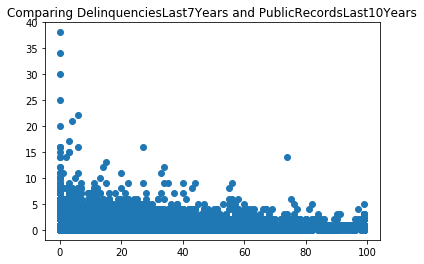

SpearmanrResult(correlation=0.2238442855856443, pvalue=0.0)


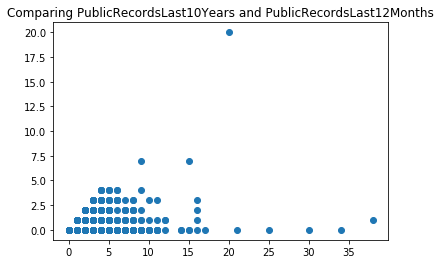

SpearmanrResult(correlation=-0.08623285802009668, pvalue=1.3031536338917587e-174)


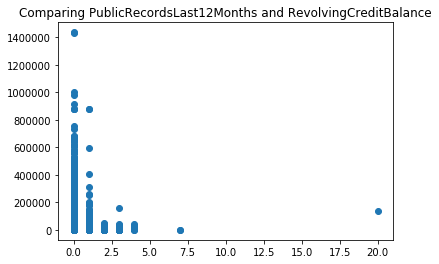

SpearmanrResult(correlation=0.4229848379794714, pvalue=0.0)


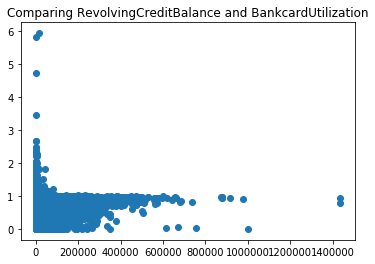

SpearmanrResult(correlation=-0.47788890784084465, pvalue=0.0)


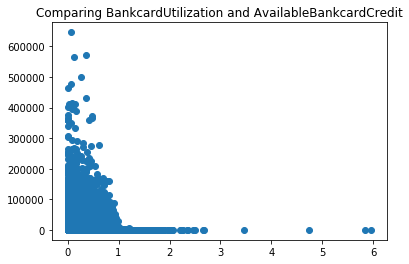

SpearmanrResult(correlation=0.28730054216668194, pvalue=0.0)


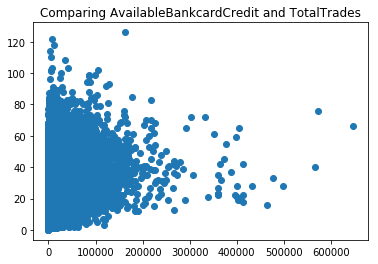

SpearmanrResult(correlation=0.03706472460775611, pvalue=1.1394590120555092e-33)


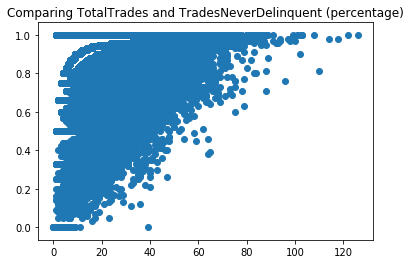

SpearmanrResult(correlation=-0.00233145315140626, pvalue=0.44697722928324224)


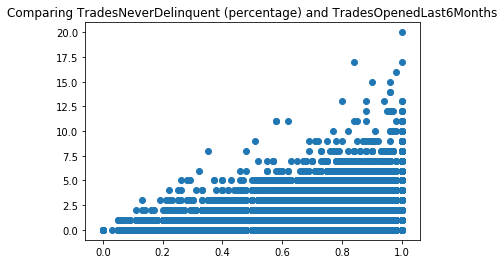

SpearmanrResult(correlation=0.05729620875286312, pvalue=5.020323961806811e-72)


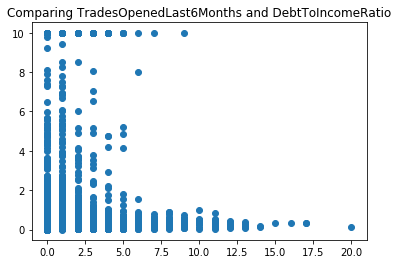

SpearmanrResult(correlation=-0.26315212541344307, pvalue=0.0)


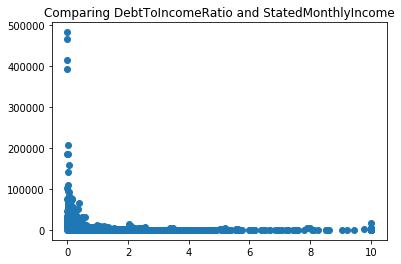

SpearmanrResult(correlation=0.05328936828894872, pvalue=2.2901533146187827e-15)


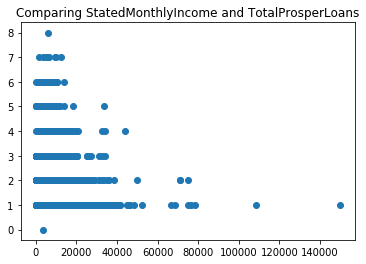

SpearmanrResult(correlation=0.6186597716766913, pvalue=0.0)


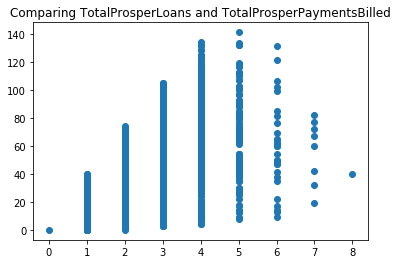

SpearmanrResult(correlation=0.988382851833924, pvalue=0.0)


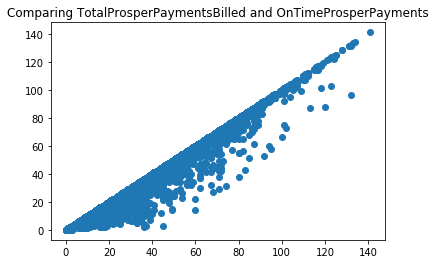

SpearmanrResult(correlation=0.15402174093882215, pvalue=2.5937468257258588e-117)


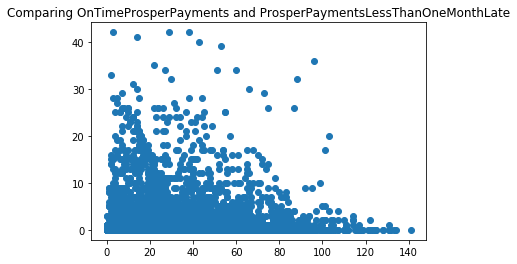

SpearmanrResult(correlation=0.3179686055633133, pvalue=0.0)


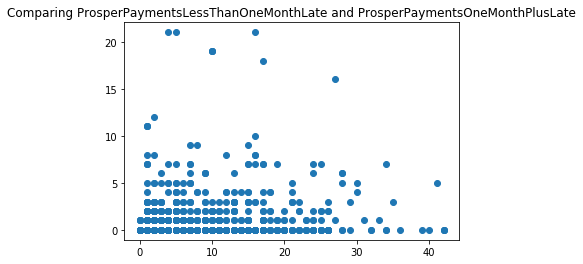

SpearmanrResult(correlation=0.01460631971603419, pvalue=0.029958287741594283)


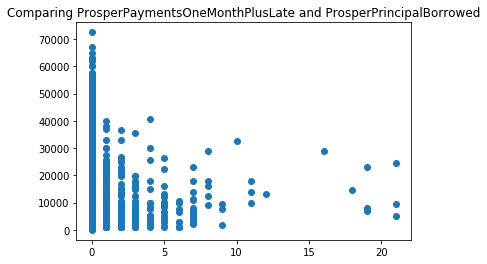

SpearmanrResult(correlation=0.39079069212792067, pvalue=0.0)


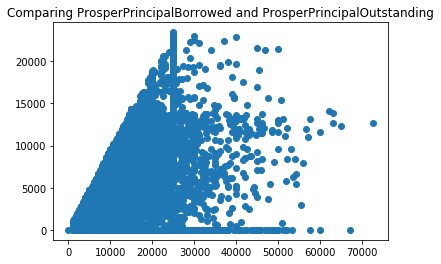

SpearmanrResult(correlation=-0.2226582957394165, pvalue=2.7831255559073114e-211)


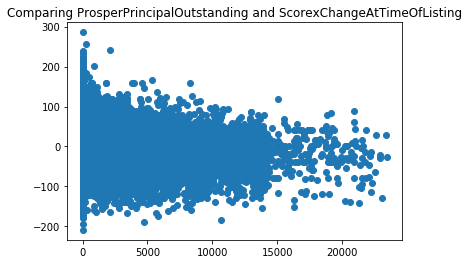

SpearmanrResult(correlation=0.20388000294480862, pvalue=3.3917757384622225e-24)


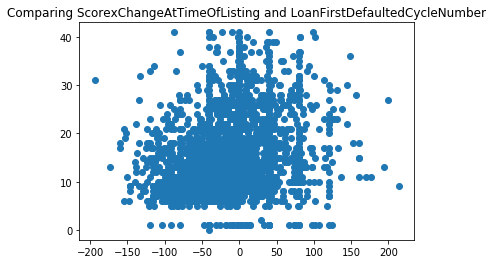

SpearmanrResult(correlation=-0.0003698671715093867, pvalue=0.9615942279839989)


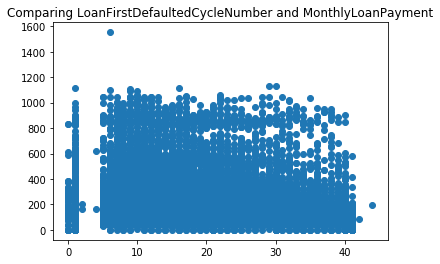

SpearmanrResult(correlation=0.28662617121738615, pvalue=0.0)


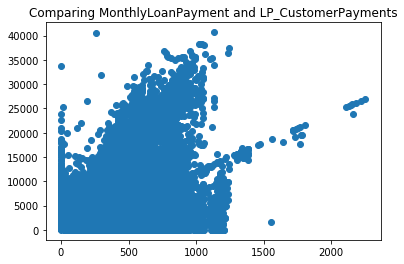

SpearmanrResult(correlation=0.9768538315817462, pvalue=0.0)


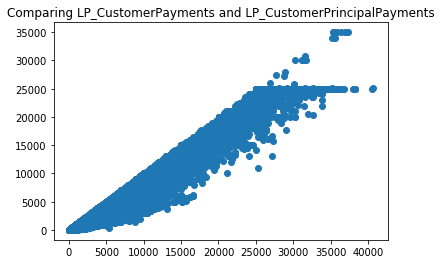

SpearmanrResult(correlation=0.6503519127689852, pvalue=0.0)


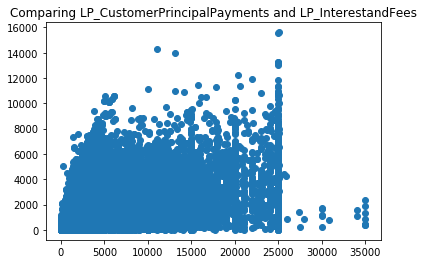

SpearmanrResult(correlation=-0.90722088444604, pvalue=0.0)


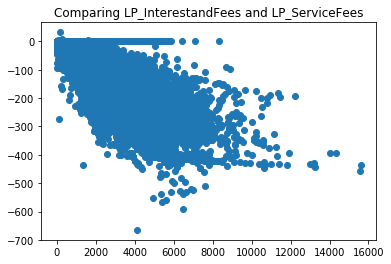

SpearmanrResult(correlation=0.05966990259765053, pvalue=2.2413509894235067e-90)


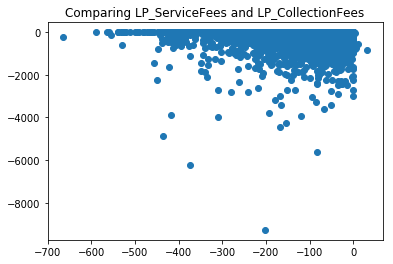

SpearmanrResult(correlation=-0.3474817287718461, pvalue=0.0)


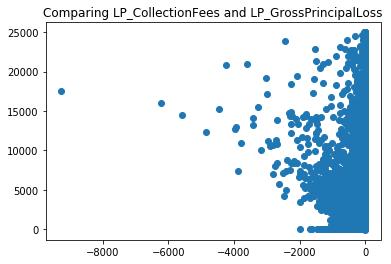

SpearmanrResult(correlation=0.9869767909912213, pvalue=0.0)


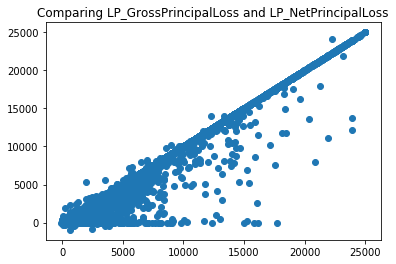

SpearmanrResult(correlation=0.3597547679820946, pvalue=0.0)


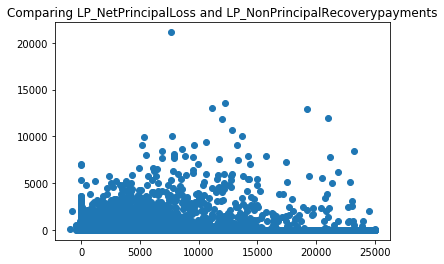

SpearmanrResult(correlation=0.0010356890578058506, pvalue=0.7266475475077019)


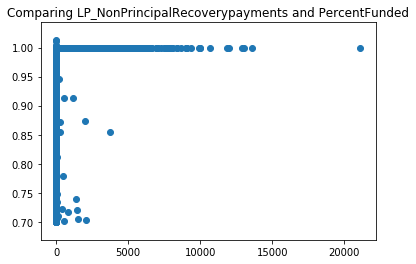

SpearmanrResult(correlation=0.002403584069907327, pvalue=0.41718687440520696)


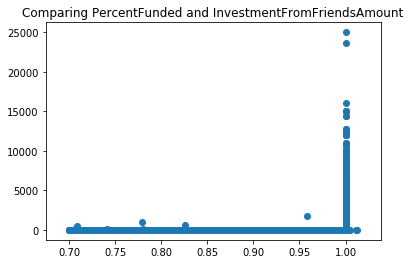

In [48]:
col_1 = str()
col_2 = str()
for col, dtype in df.dtypes.iteritems():
    if dtype == 'float64':
        if col_1 == '':
            col_1 = col
            continue
        else:
            col_2 = col
            
            x = df[col_1].values
            y = df[col_2].values
            
            print(spearmanr(x,y,nan_policy='omit'))

            plt.title(f'Comparing {col_1} and {col_2}')
            plt.scatter(x, y)
            plt.show()
            
            col_1 = col_2

---

In [19]:
for col, dtype in df.dtypes.iteritems():
    print(col, dtype)

ListingKey object
ListingNumber int64
ListingCreationDate object
CreditGrade object
Term int64
LoanStatus object
ClosedDate object
BorrowerAPR float64
BorrowerRate float64
LenderYield float64
EstimatedEffectiveYield float64
EstimatedLoss float64
EstimatedReturn float64
ProsperRating (numeric) float64
ProsperRating (Alpha) object
ProsperScore float64
ListingCategory (numeric) int64
BorrowerState object
Occupation object
EmploymentStatus object
EmploymentStatusDuration float64
IsBorrowerHomeowner bool
CurrentlyInGroup bool
GroupKey object
DateCreditPulled object
CreditScoreRangeLower float64
CreditScoreRangeUpper float64
FirstRecordedCreditLine object
CurrentCreditLines float64
OpenCreditLines float64
TotalCreditLinespast7years float64
OpenRevolvingAccounts int64
OpenRevolvingMonthlyPayment float64
InquiriesLast6Months float64
TotalInquiries float64
CurrentDelinquencies float64
AmountDelinquent float64
DelinquenciesLast7Years float64
PublicRecordsLast10Years float64
PublicRecordsLast12Mo